# Upward inference
In this jupyter notebook we will show simple example of upward inference in Logical Neural Networks.

## Model definition
Before we introduce upward inference we will define our model, predicates and axioms which will be later used for infering.

We will try to model simple geometry example. Lets have two squares $s1$ and $s2$. Since we know, that *square is also a rectangle*, we should be able to infer that these two squares are also a rectangles.

In [86]:
from lnn import Model

# create empty model
model = Model()

In [87]:
from lnn import Predicate

# define our two predicates and name them
square = Predicate(name="square")
rectangle = Predicate(name="rectangle")

# add predicates to the model
model.add_formulae(square, rectangle)

Our axiom can be easily represented in first order login as following formula:

$square(x)\implies rectangle(x)$.

In [88]:
from lnn import Variable, Implies, World

# variable is needed for defining axiom in form of "square is also a rectangle"
x = Variable("x")

# define our axiom
square_is_rect = Implies(square(x), rectangle(x), name="square-is-rect", world=World.AXIOM)

# add axiom to the model
model.add_formulae(square_is_rect)

Now, we can check if our model contains all required predicates and axioms. See the edges in the graph below.

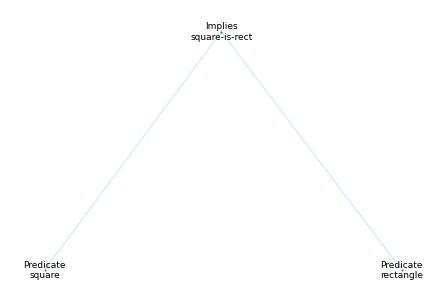

In [89]:
from lnn.utils import plot_graph

plot_graph(model)

In [85]:
# model can be also simply printed
model.print()


***************************************************************************
                                LNN Model

AXIOM  Implies: square-is-rect(x) 

OPEN   Predicate: rectangle(x0) 

OPEN   Predicate: square(x0) 

***************************************************************************


## Inference

Before inference itself, since we will do so called *grounded inference*, we add so called *facts* which will be used in the upward inference.

Remember that we mentioned two squares in the introduction, just add them to the model as facts for $square$ predicate.

In [99]:
from lnn import Fact

# add facts to our model
model.add_facts(
    {
        # note that name "square" have to match name of the predicate
        "square":
        # names of the squares s1 and s2 are arbitraty
        # Fact.TRUE are bounds [1, 1] which represents that s1 and s2 are squares in truth value 1.0
        {"s1": Fact.TRUE, "s2": Fact.TRUE}
    }
)


In [98]:
model.print()



***************************************************************************
                                LNN Model

AXIOM  Implies: square-is-rect(x) 

OPEN   Predicate: rectangle(x0) 

OPEN   Predicate: square(x0) 
's1'                                                        TRUE (1.0, 1.0)
's2'                                                        TRUE (1.0, 1.0)

***************************************************************************


In [ ]:
from lnn import Direction

In [49]:
# Perform inference
steps, facts_inferred = model.infer(direction=Direction.UPWARD)

In [50]:
print(steps)
print(facts_inferred)

1
tensor(0., grad_fn=<AddBackward0>)


In [51]:
model.print(params=True)


***************************************************************************
                                LNN Model

OPEN   ForAll: all-square-rect (x)                       UNKNOWN (0.0, 1.0)
params  α: 1.0,  β: 1.0,  w: [1. 1.]
AXIOM  Implies: square-rect(x) 
params  α: 1.0,  β: 1.0,  w: [1. 1.]
'c'                                                         TRUE (1.0, 1.0)
'k'                                                         TRUE (1.0, 1.0)

OPEN   Predicate: rectangle(x0) 
params  α: 1.0
'c'                                                      UNKNOWN (0.0, 1.0)
'k'                                                      UNKNOWN (0.0, 1.0)

OPEN   Predicate: square(x0) 
params  α: 1.0
'c'                                                         TRUE (1.0, 1.0)
'k'                                                         TRUE (1.0, 1.0)

***************************************************************************


In [35]:
# Perform inference
steps, facts_inferred = model.infer()
model.print(params=True)


***************************************************************************
                                LNN Model

AXIOM  Implies: square-rect(x) 
params  α: 1.0,  β: 1.0,  w: [1. 1.]
'c'                                                         TRUE (1.0, 1.0)
'k'                                                         TRUE (1.0, 1.0)

OPEN   Predicate: rectangle(x0) 
params  α: 1.0
'c'                                                         TRUE (1.0, 1.0)
'k'                                                         TRUE (1.0, 1.0)

OPEN   Predicate: square(x0) 
params  α: 1.0
'c'                                                         TRUE (1.0, 1.0)
'k'                                                         TRUE (1.0, 1.0)

***************************************************************************
